<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:
#TASK 1 Become familiar with the dataset

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [ ]:
#TASK 2 Generate Descriptive Statistics and Visualizations

In [ ]:
#The boxplot shows the distribution of MEDV.
#The box represents the interquartile range (IQR), 
#containing the middle 50% of the data. The line inside the box is the median.
#The "whiskers" extend to the farthest points within 1.5 times the IQR from the box.
#Points beyond the whiskers are considered outliers.  
#This plot helps visualize the spread, central tendency, and identify potential outliers in MEDV.

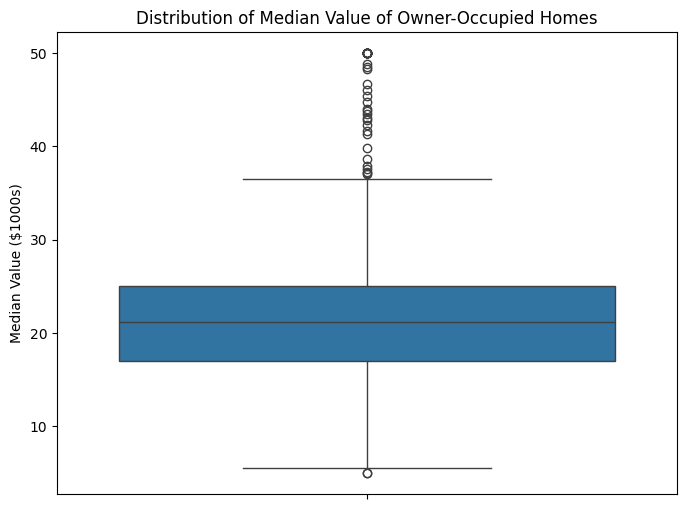

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

In [ ]:
#This bar plot shows the frequency of houses that are bounded by the Charles River (CHAS = 1) versus those that are not (CHAS = 0).
#It provides a quick visual comparison of the number of houses in each category.

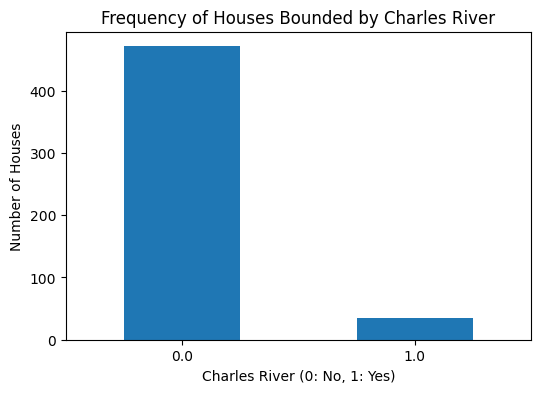

In [8]:
chas_counts = boston_df['CHAS'].value_counts()
plt.figure(figsize=(6, 4))
chas_counts.plot(kind='bar')
plt.title('Frequency of Houses Bounded by Charles River')
plt.xlabel('Charles River (0: No, 1: Yes)')
plt.ylabel('Number of Houses')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#This boxplot compares the distribution of MEDV across the three age groups. 
#It allows us to see if there are any differences in median house values based on the age of the houses.

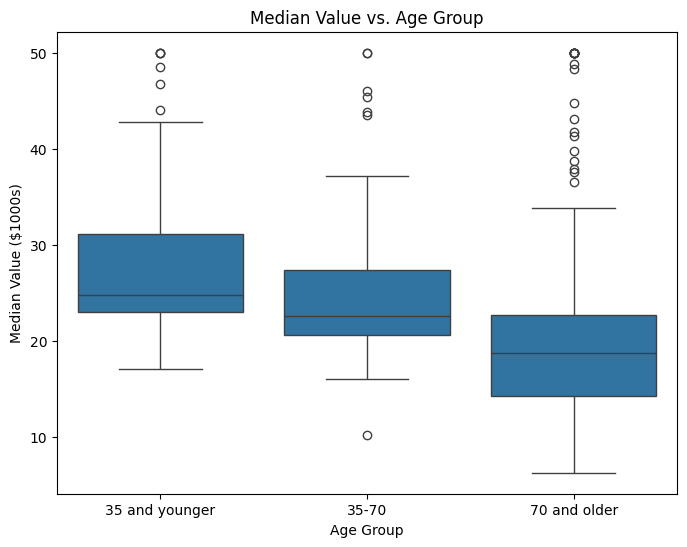

In [9]:
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 and younger', '35-70', '70 and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Median Value vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()



In [ ]:
#This scatter plot visualizes the relationship between nitric oxide concentration (NOX) and the proportion of non-retail business acres per town (INDUS). 
#We can observe the direction and strength of any linear relationship.
#This plot helps assess the correlation between these two variables.

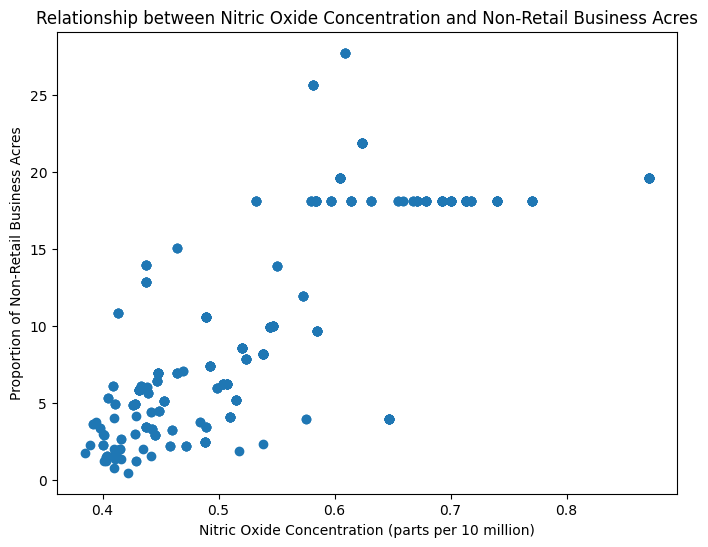

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Relationship between Nitric Oxide Concentration and Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

In [ ]:
#This histogram shows the distribution of the pupil-teacher ratio (PTRATIO).
#It helps us understand the frequency of different PTRATIO values in the dataset.
#We can observe the shape of the distribution (e.g., normal, skewed) and identify any unusual values.

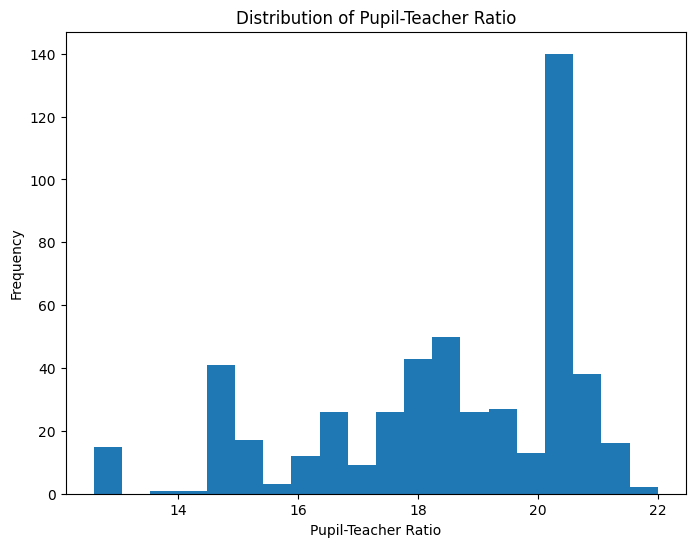

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=20)
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#TASK 3 Use the appropriate tests to answer the questions provided.

In [12]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#Question 1: Is there a significant difference in the median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [22]:
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_statistic, p_value = stats.ttest_ind(chas_0, chas_1)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in median values of houses bounded by the Charles river and those not bounded by the river.")
else:
    print("There is no significant difference in median values of houses bounded by the Charles river and those not bounded by the river.")

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in median values of houses bounded by the Charles river and those not bounded by the river.


In [ ]:
#Question 2: Is there a difference in median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

In [21]:
from scipy.stats import f_oneway

group1 = boston_df[boston_df['AGE_Group'] == '35 and younger']['MEDV']
group2 = boston_df[boston_df['AGE_Group'] == '35-70']['MEDV']
group3 = boston_df[boston_df['AGE_Group'] == '70 and older']['MEDV']

f_statistic, p_value = f_oneway(group1, group2, group3)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")

F-statistic: 30.566839914861454
P-value: 3.435569235360708e-13
There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


In [ ]:
#Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

In [20]:
from scipy.stats import pearsonr

correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
if p_value > alpha:
    print("We cannot conclude that there is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [ ]:
#Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)

In [18]:
import statsmodels.api as sm

X = boston_df['DIS'] 
X = sm.add_constant(X) 
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()

print(model.summary())

dis_coefficient = model.params['DIS']
p_value = model.pvalues['DIS']

print("DIS coefficient:", dis_coefficient)
print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
else:
    print("There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        23:16:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0